# Data Compression and Visualization using Principle Component Analysis (PCA) in Python

We use the IRIS dataset and KMeans Clustering (where we will be applying the data compression and visualization)

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [2]:
## The IRIS dataset is commonly used for pattern recognition tasks. It is readily available from the 
## scikit-learn library.

from sklearn import datasets

# load the data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# generate a pd dataframe object --> easier to explore and handle the data
df = pd.DataFrame(features)
df.columns = iris.feature_names ## adding a header

In [3]:
# check
print(target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# print dataset information

print(df.shape, "\n")
print(df.head)

(150, 4) 

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [5]:
# print data descriptions and class descriptions
## useful statistics that give us initial view of the data; can even be used to see whether the data contains missing values or not etc.
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


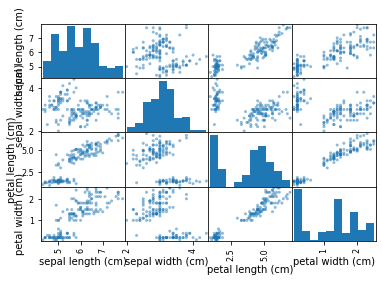

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# display scatter plot matrix
## shows some linear relationships between features that can be insightful
## also shows clusters in some relationships --> possible KMeans application

scatter_matrix(df)
plt.show()

## The Elbow Method

A method that can be used to determine the optimal number of clusters for K-means clustering.

In [7]:
 from sklearn.cluster import KMeans
    
X = []
Y = []

for i in range(1,31):
    # initialize and fit the KMeans model
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    
    # record the number of clusters
    X.append(i)
    
    # record average within-cluster sum of squares
    ## KMeans objective is to minimize the inertia (within-cluster sum of squares)
    awcss = kmeans.inertia_ / df.shape[0]
    Y.append(awcss)

C:\Users\mitus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


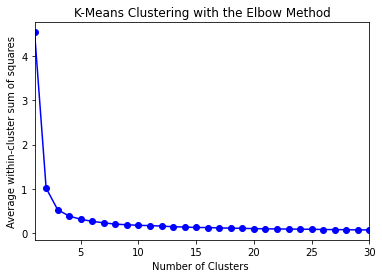

In [8]:
## Note: use KMeans minibatch if you have a large dataset !

# plot the X & Y data
plt.plot(X, Y, 'bo-')
plt.xlim((1,30))
plt.xlabel('Number of Clusters ')
plt.title('K-Means Clustering with the Elbow Method')
plt.ylabel('Average within-cluster sum of squares')
plt.show()

## Elbow type shape visible (drop in the starting)
## eventually reach an asymptote where increasing the number of clusters does not affect the error reduction.
## 3 clusters (here) is the optimal number of clusters that we can use

## PCA

A method used for dimensionality reduction of a large dataset. Best used on a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. (From the above scatter matrix we saw that such relationships between features do exist for some of the features of our dataset.)

For example, there is a strong linear correlation between the petal length and petal width which could then be transformed and compressed into its principal components giving us 1 features essentially. 

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [10]:
# perform PCA
pca = PCA(n_components= 2) ## down from 4 --> 2-dimensional visualization!
pc = pca.fit_transform(df) ## principal components

# print new dimensions
print(pc.shape)
print(pc[:10]) ## no longer a dataframe (now it's an array)

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [24]:
# refit the KMeans model to the principal components with the right number of clusters
kmeans = KMeans(n_clusters= 3)
kmeans.fit(pc) ## principal components fitted instead of original dataframe

KMeans(n_clusters=3)

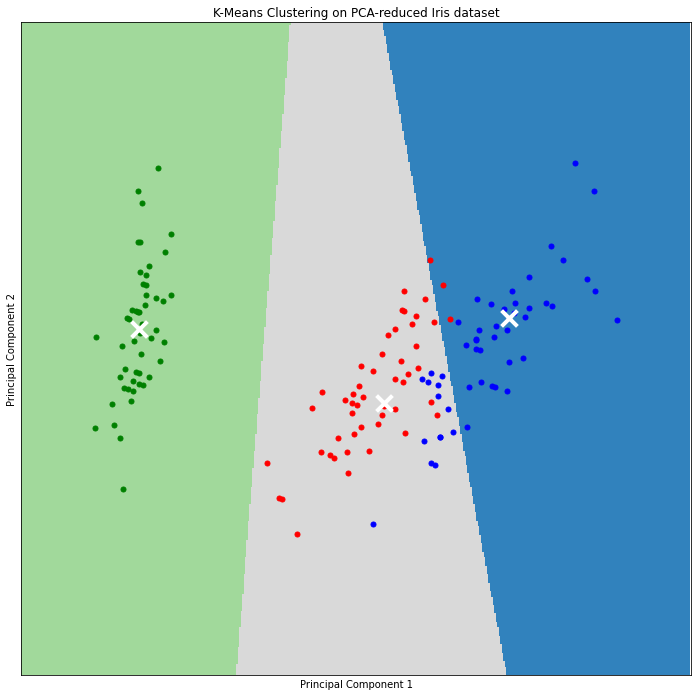

In [25]:
# Visualize high dimensional clusters using principal components

# set size for the mesh (smaller for higher quality and vice-versa)
h = 0.02

# generate the mesh grid
x_min, x_max = pc[:, 0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[:, 1].min() - 1, pc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
## np.meshgrid returns coordinate matrices from coordinate vectors 
## h is the 'stepsize'

# label each point in mesh using last trained model
## explanation for np.c_: https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# generate color plot from results
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12,12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest' , extent = (xx.min(), xx.max() , yy.min(), yy.max()),
cmap = plt.cm.tab20c, ## colourmap
aspect = 'auto' , origin = 'lower', zorder = 1)

# plot the principle components on the color plot
for i, point in enumerate(pc):
    ## colouring based on target class as defined in the starting from the dataset
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10, zorder = 3)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10, zorder = 3)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10, zorder = 3)
        
# plot the cluster centroids
centroids = kmeans.cluster_centers_
## documentation: ndarray of shape (n_clusters, n_features); coordinates of cluster centers. 
plt.scatter(centroids[:, 0],centroids[:, 1], marker= 'x', s= 250,
           linewidth= 4, color = 'w', zorder = 10) ## zorder puts them in front

# set plot title and axes limits
plt.title("K-Means Clustering on PCA-reduced Iris dataset")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xticks(())
plt.yticks(())

plt.show()        

## colour segments show the separation of target class (true values)
## dots represent our predictions; the ones reaching into other segments are misclassified
## This visualization tells us that this clustering is well segmented, and will be reflected in higher dimensional feature spaces as well.
## Therefore, it is a good clustering obtained for the given dataset.

## Cluster Metrics

1. **Homogeneity** - measures whether or not all of its clusters contain only data points which are members of a single class.
2. **Completeness** - measures whether or not all members of a given class are elements of the same cluster
3. **V-measure** - the harmonic mean between homogeneity and completeness

In [28]:
from sklearn import metrics

# K-means clustering performed on non-reduced data
kmeans1 = KMeans(n_clusters= 3)
kmeans1.fit(features)

# K-Means clustering performed on reduced data
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(pc) ## principal components

# Print out metrics for both approaches
print('Non-reduced data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure: {} \n'.format(metrics.v_measure_score(target, kmeans1.labels_)))

      
print('PCA reduced data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure: {} '.format(metrics.v_measure_score(target, kmeans2.labels_)))
## slightly worse (because misclassifications occur due to lost information --> accuracy reduced)
## However, still good scores as compared to the original data Kmeans clustering!

Non-reduced data
Homogeneity: 0.7514854021988339
Completeness: 0.7649861514489816
V-measure: 0.7581756800057786 

PCA reduced data
Homogeneity: 0.736419288125285
Completeness: 0.7474865805095325
V-measure: 0.7419116631817838 


In [29]:
# Compare results further with actual labels obtained
print(kmeans1.labels_)
print(kmeans2.labels_)
print(target)

## multiple runs may give the same values across components
## However, few misclassifications.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
